In [1]:
import pandas as pd
from matplotlib import pyplot
from pandas import datetime
from pandas import read_excel
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

<ipython-input-1-0f936dd14419>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
data = pd.read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\Airlines+Data.xlsx")

In [3]:
series = read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\Airlines+Data.xlsx", 
                    header=0, index_col=0,parse_dates=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


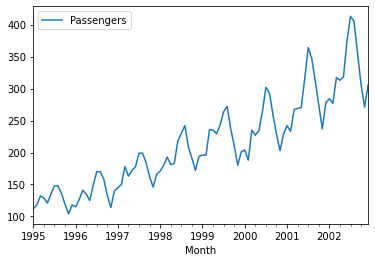

In [7]:
series.plot()
pyplot.show()

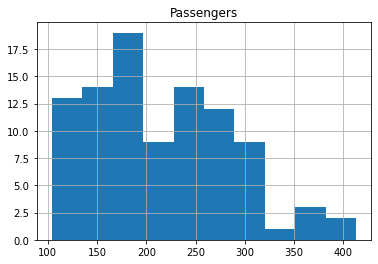

In [8]:
from matplotlib import pyplot
series = read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\Airlines+Data.xlsx", 
                    header=0, index_col=0,parse_dates=True)
series.hist()
pyplot.show()

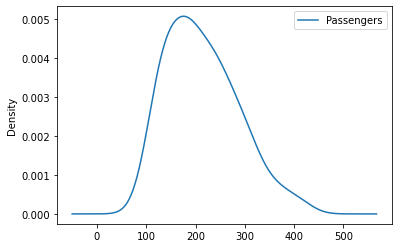

In [9]:
#density plot
series = read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\Airlines+Data.xlsx", 
                    header=0, index_col=0,parse_dates=True)
series.plot(kind='kde')
pyplot.show()

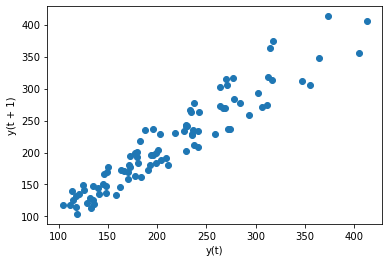

In [10]:
from pandas.plotting import lag_plot
series = read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\Airlines+Data.xlsx", 
                    header=0, index_col=0,parse_dates=True)
lag_plot(series)
pyplot.show()

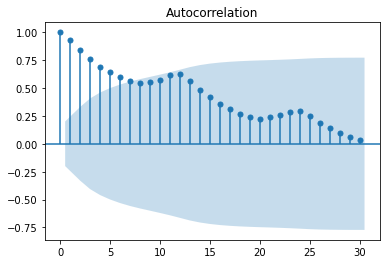

In [11]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
series = read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\Airlines+Data.xlsx", 
                    header=0, index_col=0,parse_dates=True)
plot_acf(series,lags=30)
pyplot.show()

In [12]:
upsampled = series.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


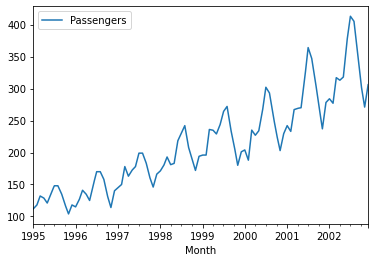

In [13]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

In [14]:
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()

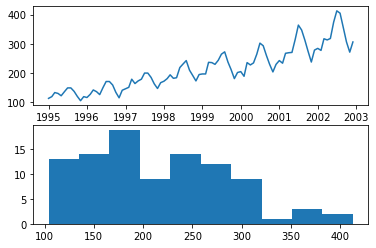

In [15]:
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

In [16]:
dataframe = DataFrame(series.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

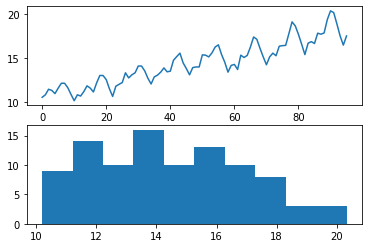

In [17]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

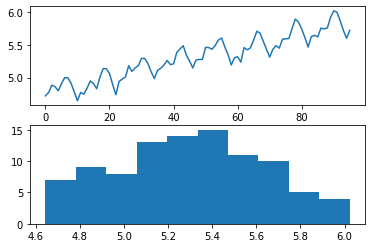

In [18]:
from numpy import log
dataframe = DataFrame(series.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

            Passengers
Month                 
1995-03-31  120.666667
1995-06-30  128.333333
1995-09-30  144.000000
1995-12-31  113.666667
1996-03-31  127.333333


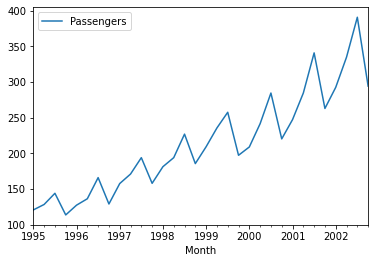

In [19]:
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

In [20]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime

<AxesSubplot:xlabel='year', ylabel='Passengers'>

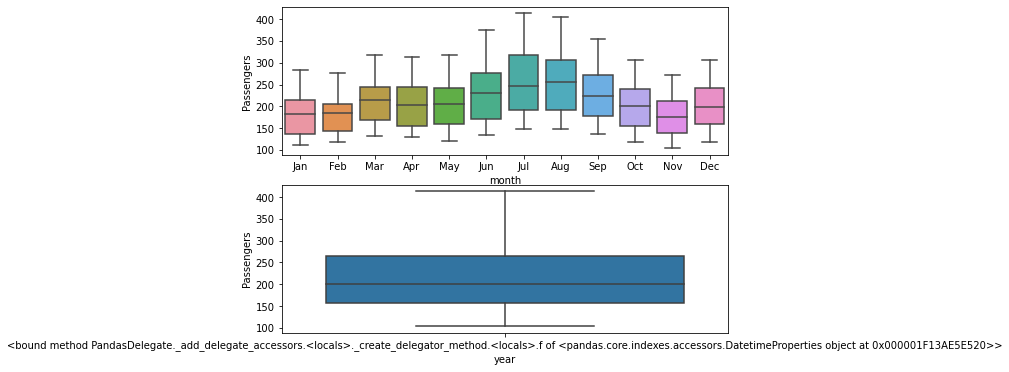

In [21]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)


In [22]:
Train = data.head(77)
Test = data.tail(20)

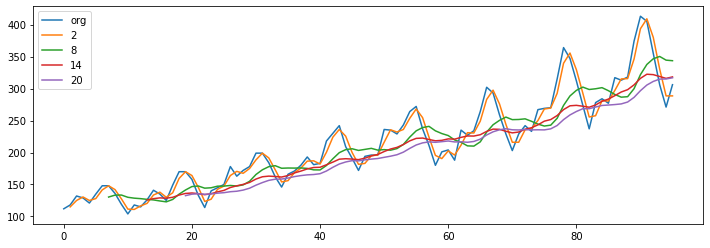

In [23]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

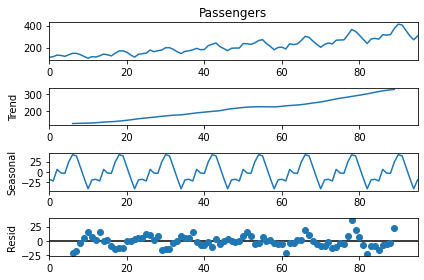

In [25]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

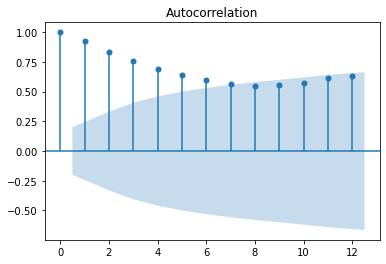

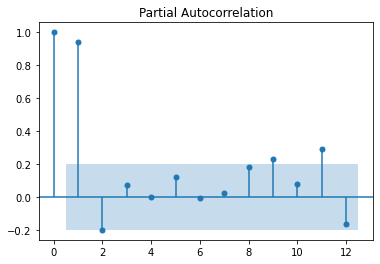

In [26]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()


In [27]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [28]:
#Simple Exponential Method
import numpy as np
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

C:\Users\akshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


19.308023765816458

In [29]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

<ipython-input-29-31e8e28b1106>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


12.107091490601421

In [30]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

7.793891133242559

In [31]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

8.177774648211312

In [32]:
#Final Model
hwe_model_add_add = ExponentialSmoothing(data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [33]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.234886
97     311.527891
98     350.278075
99     346.984195
100    351.844121
101    403.924848
102    440.565979
103    427.445771
104    376.627413
105    329.766583
dtype: float64

In [34]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [35]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [36]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

In [37]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [38]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [39]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [40]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [41]:
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

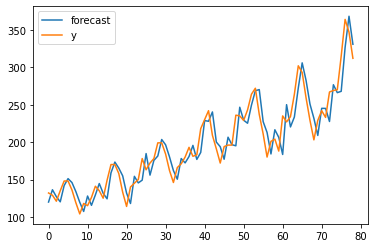

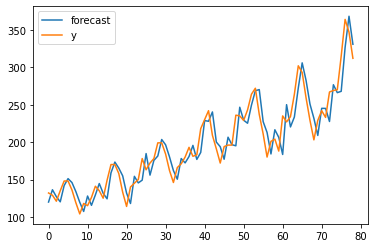

In [42]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [43]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

71.93698937123906

In [44]:
# fit model
data = pd.read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\Airlines+Data.xlsx",
                     header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [45]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

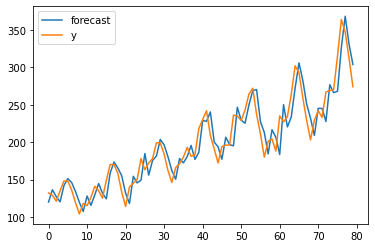

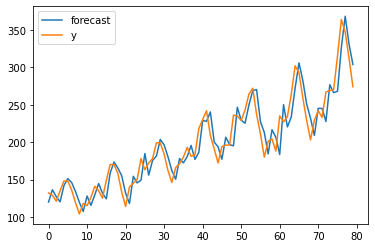

In [46]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [47]:
forecast

array([271.54444147, 272.96717675, 277.13673594, 280.43795632,
       282.22673981, 283.52403658, 285.09891045, 287.00429979,
       288.98785837, 290.89404002])

# Coca_cola Dataset

In [48]:
data = pd.read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\CocaCola_Sales_Rawdata.xlsx")

In [49]:
series = read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\CocaCola_Sales_Rawdata.xlsx", 
                    header=0, index_col=0,parse_dates=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [51]:
data.duplicated().sum()

0

In [52]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


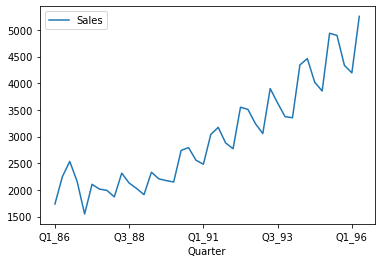

In [53]:
series.plot()
pyplot.show()

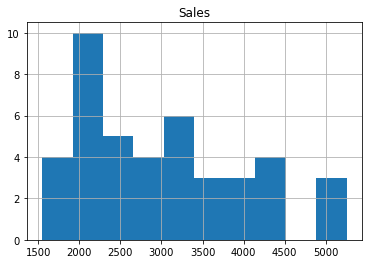

In [54]:
from matplotlib import pyplot
series.hist()
pyplot.show()

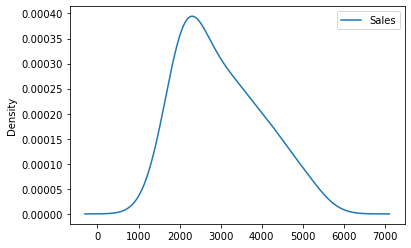

In [55]:
#density plot
series.plot(kind='kde')
pyplot.show()

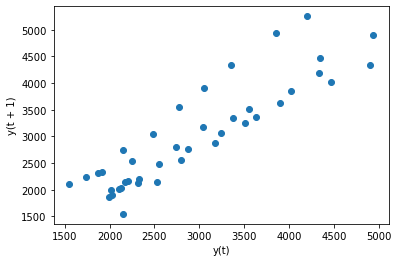

In [56]:
from pandas.plotting import lag_plot

lag_plot(series)
pyplot.show()

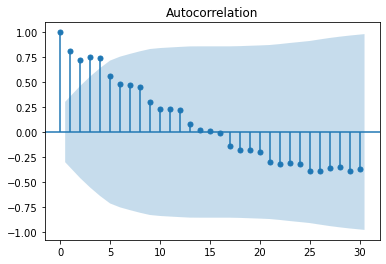

In [57]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series,lags=30)
pyplot.show()

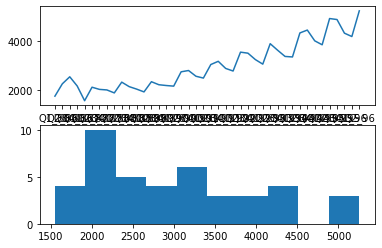

In [58]:
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

In [59]:
cococola = pd.read_excel(r"D:\z Data Science\Assignment\Assignment\Assignment 18\CocaCola_Sales_Rawdata.xlsx")

In [60]:
import numpy as np
quarter=['Q1','Q2','Q3','Q4']
n=cococola['Quarter'][0]
n[0:2]

cococola['quarter']=0

for i in range(42):
    n=cococola['Quarter'][i]
    cococola['quarter'][i]=n[0:2]

In [61]:
dummy=pd.DataFrame(pd.get_dummies(cococola['quarter']))

In [62]:
coco=pd.concat((cococola,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']

log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

<AxesSubplot:>

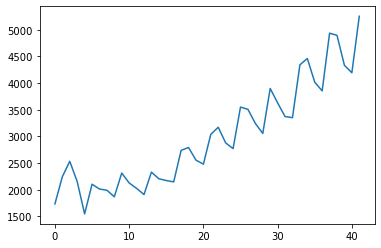

In [63]:
train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()

<AxesSubplot:xlabel='Sales'>

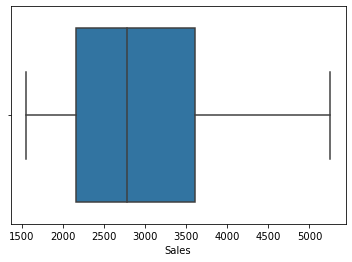

In [65]:
sns.boxplot("Sales",data=cococola)

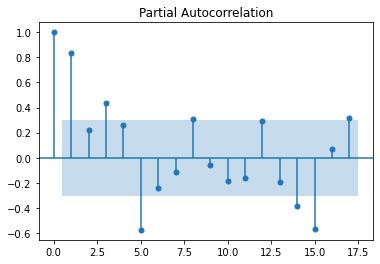

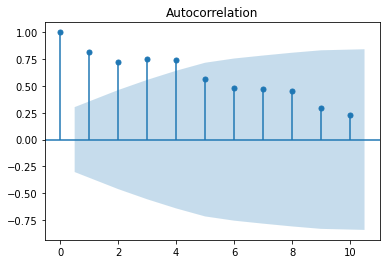

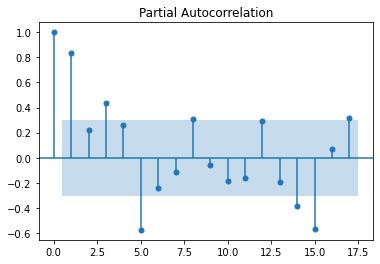

In [68]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(cococola.Sales,lags=10)
tsa_plots.plot_pacf(cococola.Sales)


In [69]:
import statsmodels.formula.api as smf

In [70]:
#linear model
linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

421.17878760022745

In [71]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

475.5618351831504

In [72]:
#exponential model
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.2479731067161

In [73]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1860.0238154547274

In [74]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

38    4292.265126
39    4066.761792
40    3961.769195
41    4639.214094
dtype: float64

In [75]:
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

464.9829023982257

In [76]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

301.73800719347435

In [77]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779681

In [78]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

225.52439049828402

In [79]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187958758

In [80]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
data

Rmse=pd.DataFrame(data)
Rmse




,Model,Values
0,rmse_mul_quad,581.845719
1,rmseadd,1860.023815
2,rmseaddlinear,464.982902
3,rmseaddquad,301.738007
4,rmseexpo,466.247973
5,rmselin,421.178788
6,rmsemul,1963.389640
7,rmsemulin,225.524390
8,rmsequad,475.561835


In [81]:
#final model with least rmse value
predictions = cococola['Sales'][37:]
test_val = cococola['Sales'][36:-1]
rmse = np.sqrt((mean_squared_error(test_val, predictions)))
rmse

725.1277128892538

In [94]:
train = cococola['Sales'][:36]
test = cococola['Sales'][36:]
test

36    3854.0
37    4936.0
38    4895.0
39    4333.0
40    4194.0
41    5253.0
Name: Sales, dtype: float64

In [95]:
model = ARIMA(train, order=(3,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 6)[0]
rmse = np.sqrt(np.mean((test - forecast)**2))
rmse

429.1079325914504

In [96]:

pred_df = pd.DataFrame()
pred_df['Actual'] = test
pred_df['Predictions'] = forecast
pred_df['% Error'] = abs(test - forecast) / test * 100
pred_df

,Actual,Predictions,% Error
36,3854.0,3709.510822,3.749071
37,4936.0,4342.512673,12.023649
38,4895.0,4669.203069,4.612808
39,4333.0,4370.812109,0.872654
40,4194.0,4056.215562,3.285275
41,5253.0,4440.412272,15.469022
